# Suicide analysis by Gender and Age range 35-54



## Import data and preprocessing

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import scipy.cluster.hierarchy as hac
from datetime import datetime
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#For Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#For Google Colab
path = "/content/drive/My Drive/Colab Notebooks/"
file1 = "57_countries.csv"
df = pd.read_csv(path+file1)

df.head()


country  year   sex  ... 35-54 years  55-74 years  75+ years
0  Argentina  1985  male  ...           0            0        202
1  Argentina  1985  male  ...           0          485          0
2  Argentina  1985  male  ...         414            0          0
3  Argentina  1985  male  ...           0            0          0
4  Argentina  1985  male  ...           0            0          0

[5 rows x 34 columns]

In [ ]:
ager = df["age"].unique()
ager.sort()
lst = [ager[3], ager[0], ager[1], ager[2], ager[4], ager[5]]
lst

['5-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

In [ ]:
# #DIVISION OF DF BY AGE RANGE

df35 = df[df["age"] == lst[3]]
df35 = df35.reset_index(drop=True)


In [ ]:
male_df = df35[df35["sex"] == "male"]
male_df = male_df.reset_index(drop=True)
female_df = df35[df35["sex"] == "female"]
female_df = female_df.reset_index(drop=True)

In [ ]:
male_df

country  year   sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  male  ...         414            0          0
1     Argentina  1986  male  ...         478            0          0
2     Argentina  1987  male  ...         482            0          0
3     Argentina  1988  male  ...         477            0          0
4     Argentina  1989  male  ...         462            0          0
...         ...   ...   ...  ...         ...          ...        ...
1649    Uruguay  2010  male  ...         101            0          0
1650    Uruguay  2012  male  ...         144            0          0
1651    Uruguay  2013  male  ...         118            0          0
1652    Uruguay  2014  male  ...         150            0          0
1653    Uruguay  2015  male  ...         135            0          0

[1654 rows x 34 columns]

In [ ]:
print(len(male_df))
print(len(female_df))


1654
1654


In [ ]:
male_df.isnull().sum()


country                         0
year                            0
sex                             0
age                             0
suicides_no                     0
population                      0
suicides/100k pop               0
country-year                    0
 gdp_for_year ($)               0
gdp_per_capita ($)              0
generation                      0
Country-Age-sex                 0
Total_suicides                  0
Total_population                0
Max_Suicide                     0
Max_Population                  0
Min_suicides                    0
min_population                  0
Mean_suicides                   0
Mean_population                 0
GDP_percentage_growth           0
Population_percentage_growth    0
SPPI                            0
countrylabel                    0
sexlabel                        0
agelabel                        0
genlabels                       0
Country-Age-sex-range           0
5-14 years                      0
15-24 years   

In [ ]:
male_df = male_df.reset_index(drop=True)
female_df = female_df.reset_index(drop=True)


In [ ]:
female_df

country  year     sex  ... 35-54 years  55-74 years  75+ years
0     Argentina  1985  female  ...         142            0          0
1     Argentina  1986  female  ...         188            0          0
2     Argentina  1987  female  ...         209            0          0
3     Argentina  1988  female  ...         198            0          0
4     Argentina  1989  female  ...         166            0          0
...         ...   ...     ...  ...         ...          ...        ...
1649    Uruguay  2010  female  ...          38            0          0
1650    Uruguay  2012  female  ...          44            0          0
1651    Uruguay  2013  female  ...          38            0          0
1652    Uruguay  2014  female  ...          45            0          0
1653    Uruguay  2015  female  ...          38            0          0

[1654 rows x 34 columns]

In [ ]:
male_df.set_index('year', inplace = True)
male_df.sort_values(by = ['year', 'country'], inplace = True)
male_df.sort_index(inplace = True)
female_df.set_index('year', inplace = True)
female_df.sort_values(by = ['year', 'country'], inplace = True)
female_df.sort_index(inplace = True)


In [ ]:
male_df

country   sex          age  ...  35-54 years  55-74 years  75+ years
year                                  ...                                     
1985    Argentina  male  35-54 years  ...          414            0          0
1985    Australia  male  35-54 years  ...          411            0          0
1985      Austria  male  35-54 years  ...          515            0          0
1985     Barbados  male  35-54 years  ...            0            0          0
1985      Belgium  male  35-54 years  ...          493            0          0
...           ...   ...          ...  ...          ...          ...        ...
2016    Mauritius  male  35-54 years  ...           33            0          0
2016  Netherlands  male  35-54 years  ...          478            0          0
2016      Romania  male  35-54 years  ...          632            0          0
2016       Sweden  male  35-54 years  ...          266            0          0
2016     Thailand  male  35-54 years  ...         1421            0          0

[1654 rows x 33 columns]

In [ ]:
## Total No of Suicides
targets = male_df.columns[3:4]

country = male_df["country"].unique()
## Total No of Suicides
fetargets = female_df.columns[3:4]

fecountry = female_df["country"].unique()




In [ ]:
targets

Index(['suicides_no'], dtype='object')

### 1 A. Extract time series for each country

Men range 15-24 year Argentina 's suicides_no


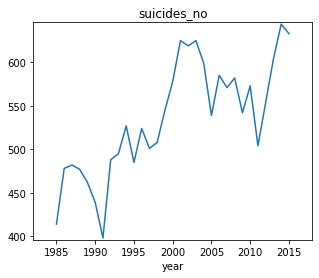

Men range 15-24 year Australia 's suicides_no


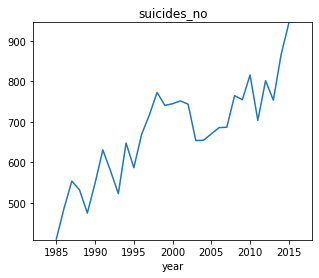

Men range 15-24 year Austria 's suicides_no


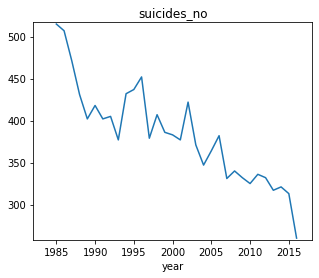

Men range 15-24 year Barbados 's suicides_no


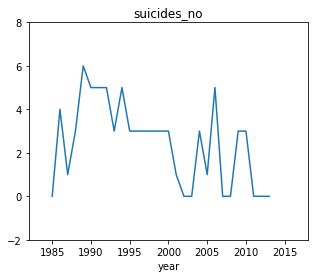

Men range 15-24 year Belgium 's suicides_no


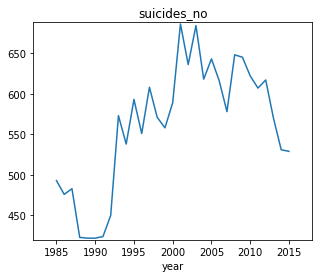

Men range 15-24 year Brazil 's suicides_no


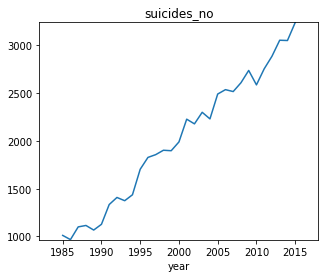

Men range 15-24 year Bulgaria 's suicides_no


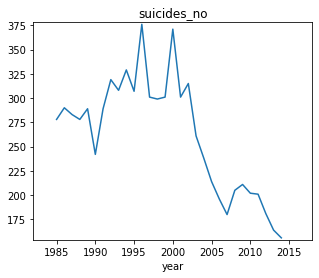

Men range 15-24 year Canada 's suicides_no


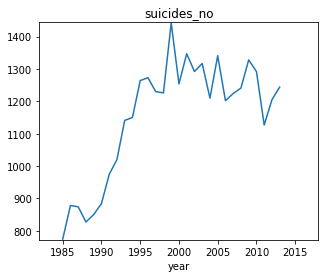

Men range 15-24 year Chile 's suicides_no


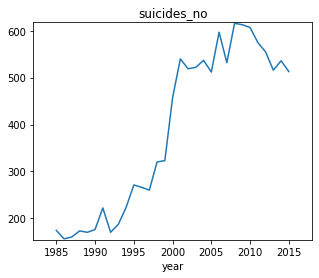

Men range 15-24 year Colombia 's suicides_no


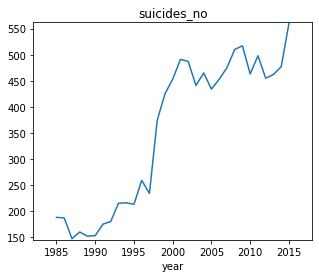

Men range 15-24 year Costa Rica 's suicides_no


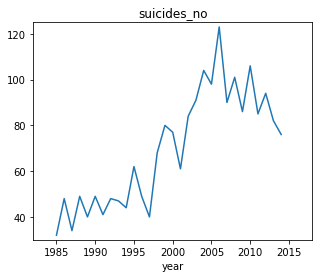

Men range 15-24 year Ecuador 's suicides_no


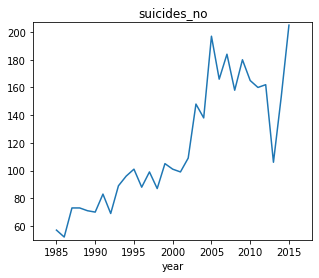

Men range 15-24 year France 's suicides_no


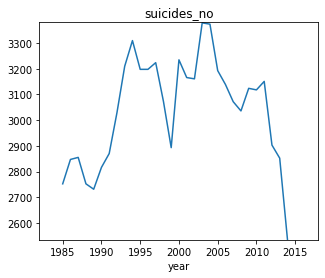

Men range 15-24 year Greece 's suicides_no


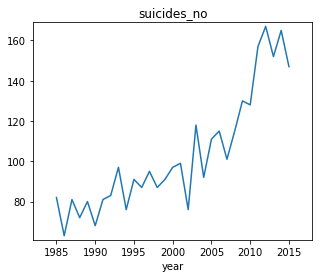

Men range 15-24 year Grenada 's suicides_no


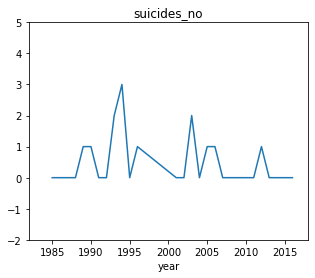

Men range 15-24 year Iceland 's suicides_no


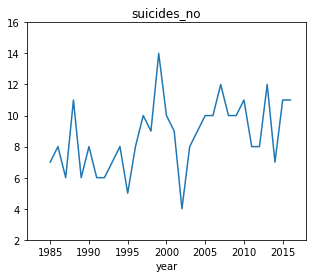

Men range 15-24 year Ireland 's suicides_no


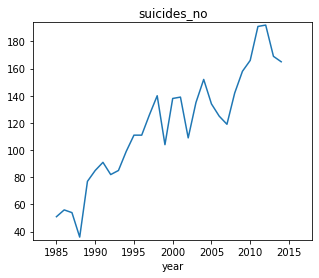

Men range 15-24 year Israel 's suicides_no


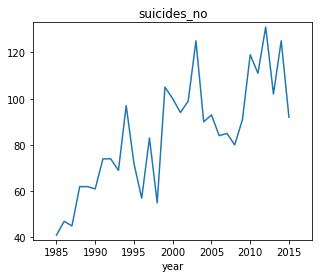

Men range 15-24 year Italy 's suicides_no


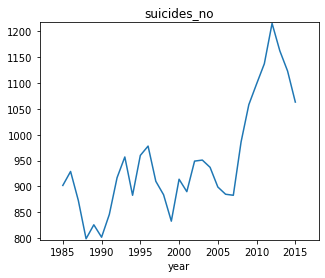

Men range 15-24 year Japan 's suicides_no


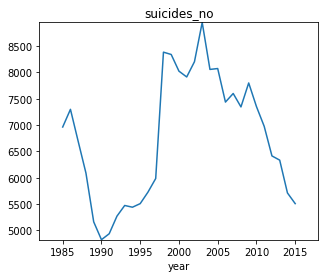

Men range 15-24 year Kuwait 's suicides_no


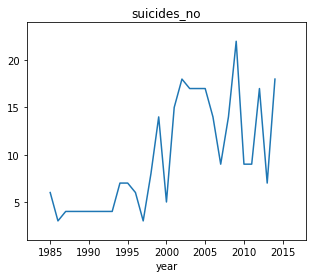

Men range 15-24 year Luxembourg 's suicides_no


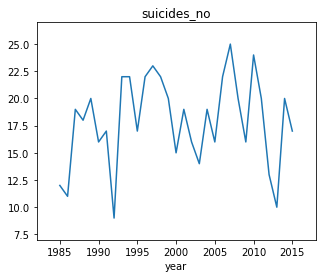

Men range 15-24 year Malta 's suicides_no


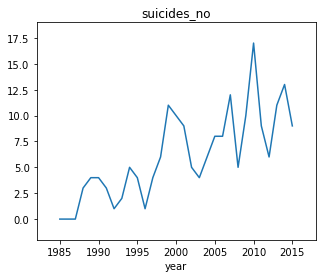

Men range 15-24 year Mauritius 's suicides_no


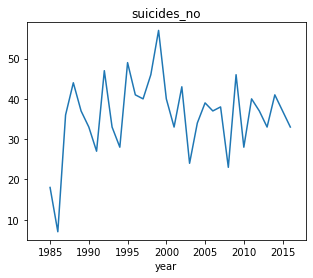

Men range 15-24 year Mexico 's suicides_no


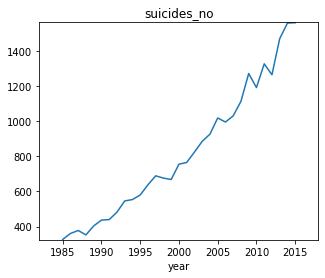

Men range 15-24 year Netherlands 's suicides_no


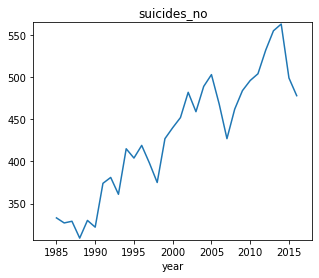

Men range 15-24 year New Zealand 's suicides_no


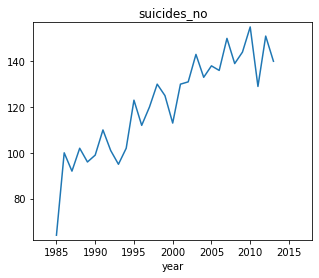

Men range 15-24 year Panama 's suicides_no


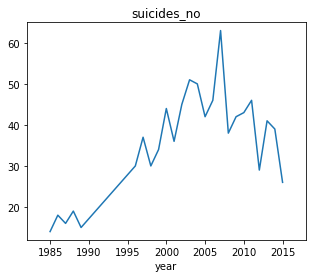

Men range 15-24 year Paraguay 's suicides_no


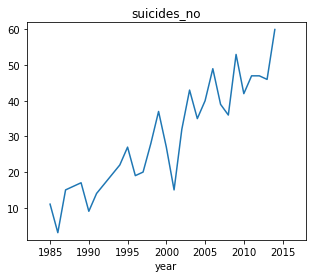

Men range 15-24 year Portugal 's suicides_no


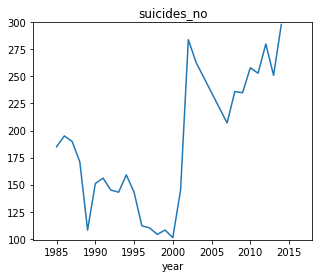

Men range 15-24 year Puerto Rico 's suicides_no


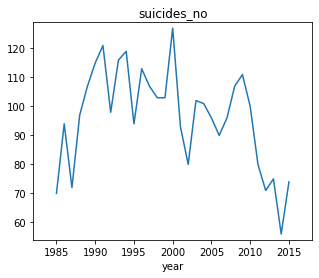

Men range 15-24 year Republic of Korea 's suicides_no


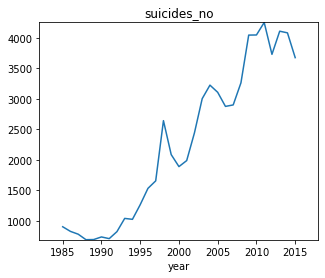

Men range 15-24 year Saint Vincent and Grenadines 's suicides_no


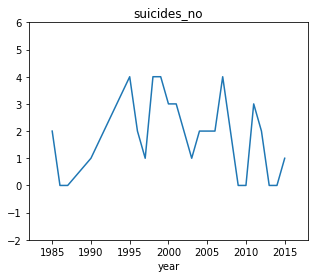

Men range 15-24 year Singapore 's suicides_no


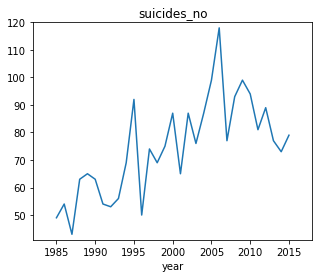

Men range 15-24 year Spain 's suicides_no


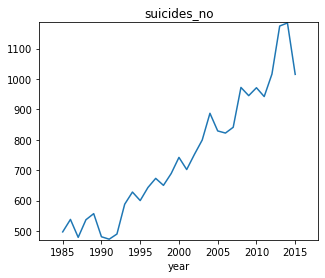

Men range 15-24 year Suriname 's suicides_no


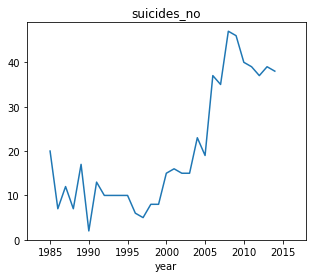

Men range 15-24 year Thailand 's suicides_no


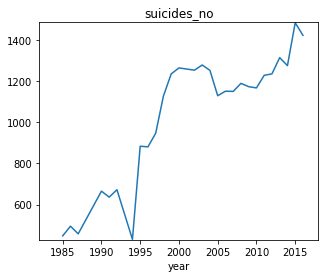

Men range 15-24 year Trinidad and Tobago 's suicides_no


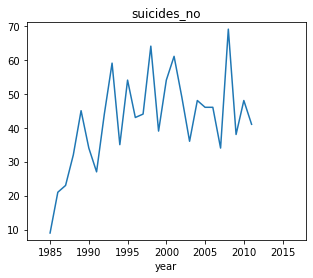

Men range 15-24 year United Kingdom 's suicides_no


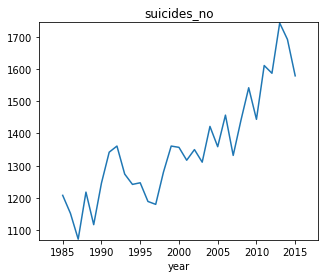

Men range 15-24 year United States 's suicides_no


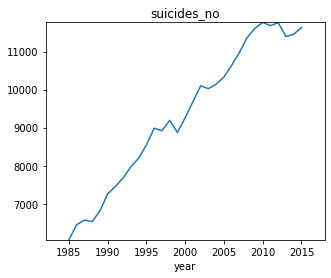

Men range 15-24 year Uruguay 's suicides_no


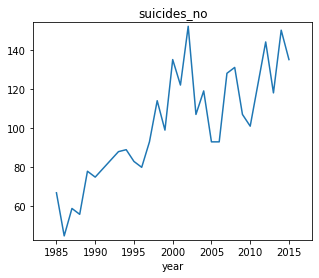

Men range 15-24 year Belize 's suicides_no


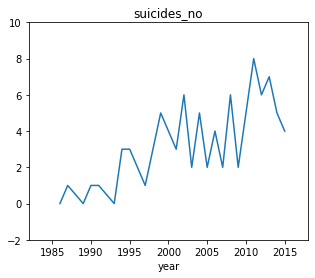

Men range 15-24 year Guatemala 's suicides_no


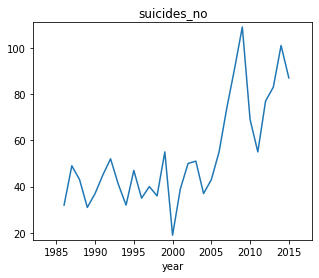

Men range 15-24 year Norway 's suicides_no


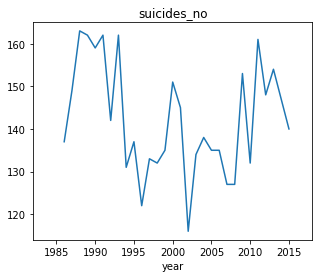

Men range 15-24 year Saint Lucia 's suicides_no


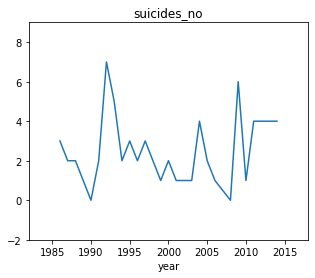

Men range 15-24 year Finland 's suicides_no


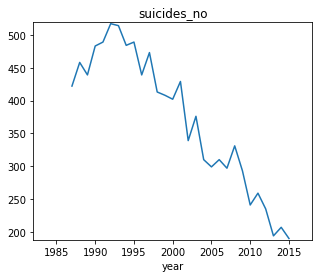

Men range 15-24 year Sweden 's suicides_no


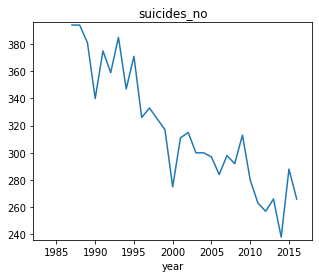

Men range 15-24 year Guyana 's suicides_no


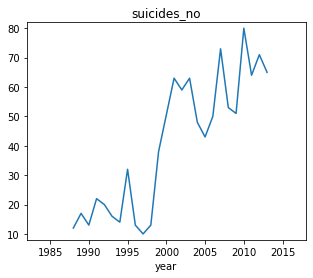

Men range 15-24 year Ukraine 's suicides_no


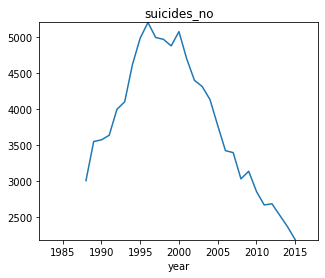

Men range 15-24 year Romania 's suicides_no


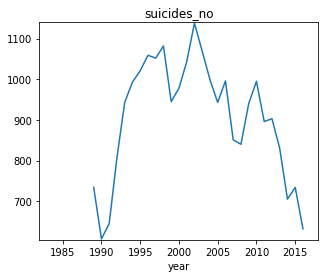

Men range 15-24 year Russian Federation 's suicides_no


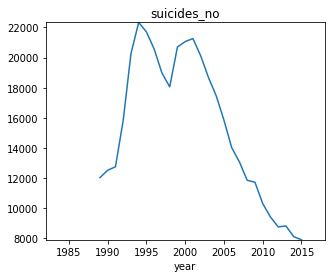

Men range 15-24 year Armenia 's suicides_no


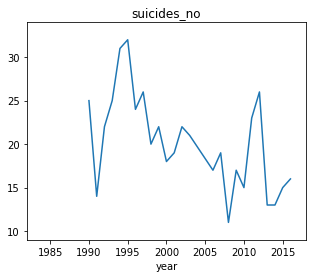

Men range 15-24 year Czech Republic 's suicides_no


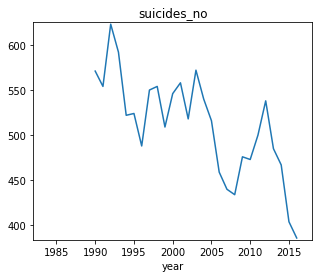

Men range 15-24 year Germany 's suicides_no


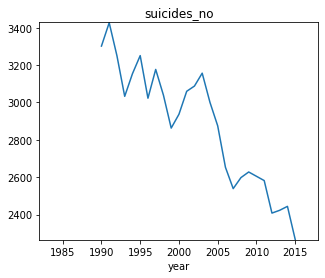

Men range 15-24 year Kazakhstan 's suicides_no


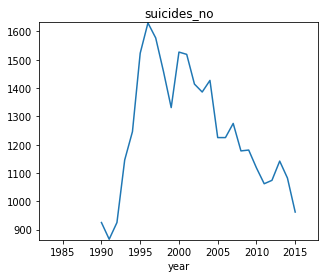

Men range 15-24 year Kyrgyzstan 's suicides_no


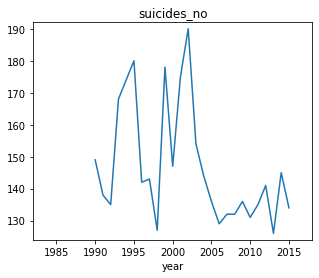

Men range 15-24 year Hungary 's suicides_no


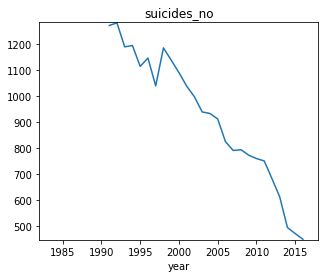

In [ ]:
# For male
for s in country:
    for t in targets:
      print("Men range 15-24 year", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = male_df[male_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(male_df[male_df["country"] == s][t].min()-2,male_df[male_df["country"] == s][t].max()+2)
      plt.show()

Women  Argentina 's suicides_no


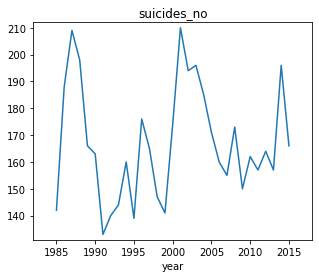

Women  Australia 's suicides_no


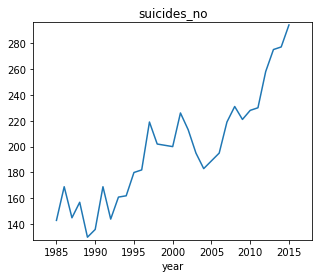

Women  Austria 's suicides_no


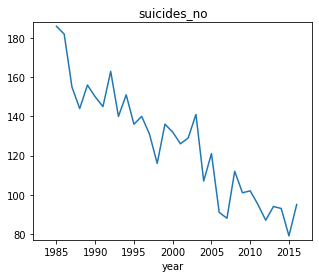

Women  Barbados 's suicides_no


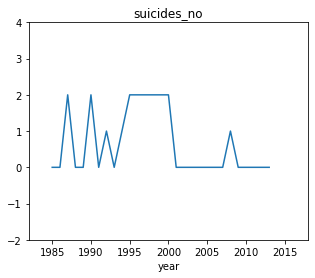

Women  Belgium 's suicides_no


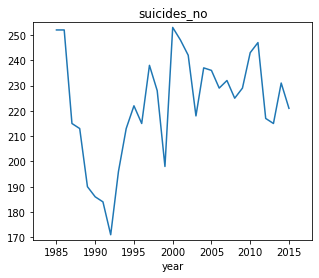

Women  Brazil 's suicides_no


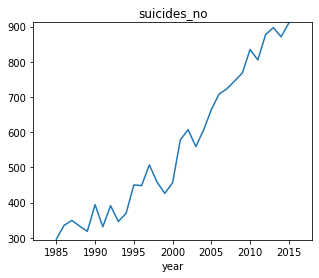

Women  Bulgaria 's suicides_no


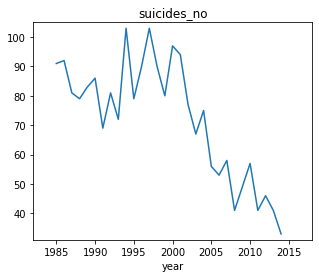

Women  Canada 's suicides_no


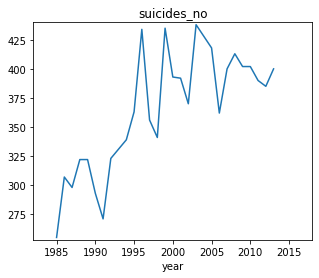

Women  Chile 's suicides_no


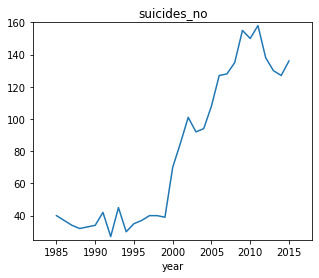

Women  Colombia 's suicides_no


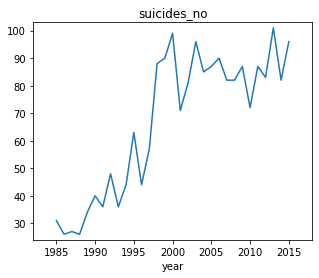

Women  Costa Rica 's suicides_no


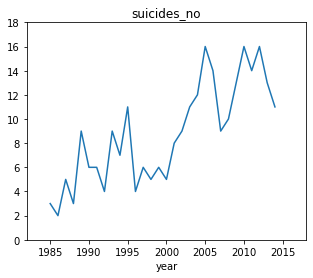

Women  Ecuador 's suicides_no


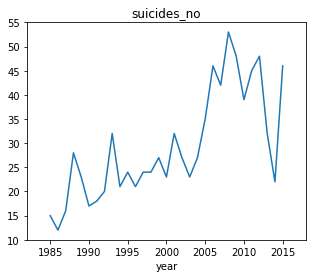

Women  France 's suicides_no


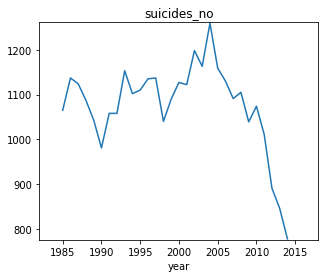

Women  Greece 's suicides_no


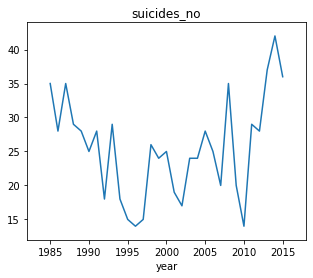

Women  Grenada 's suicides_no


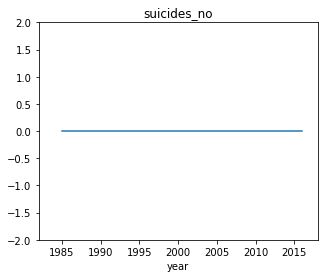

Women  Iceland 's suicides_no


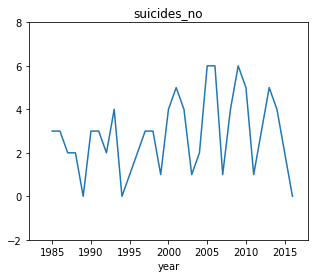

Women  Ireland 's suicides_no


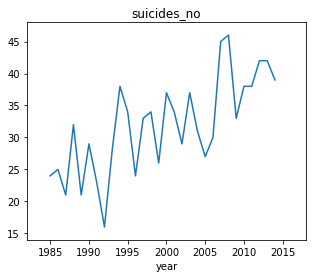

Women  Israel 's suicides_no


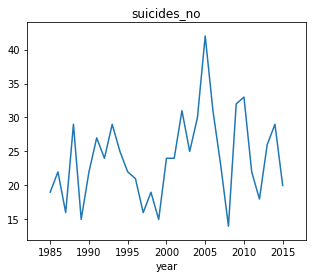

Women  Italy 's suicides_no


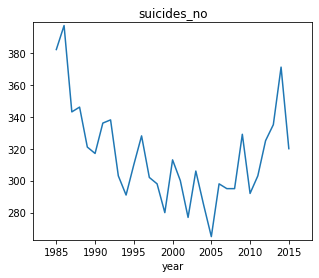

Women  Japan 's suicides_no


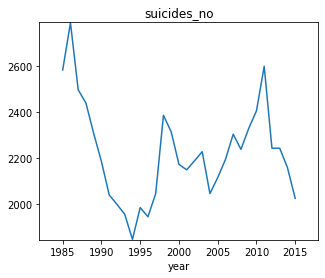

Women  Kuwait 's suicides_no


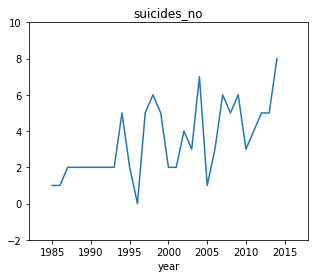

Women  Luxembourg 's suicides_no


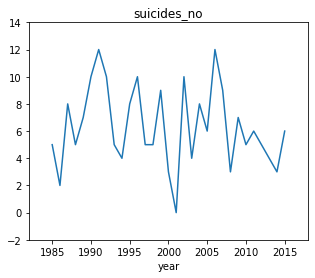

Women  Malta 's suicides_no


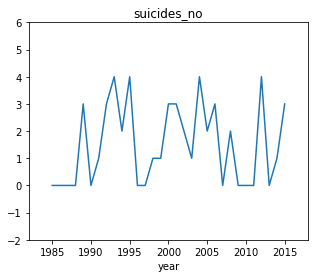

Women  Mauritius 's suicides_no


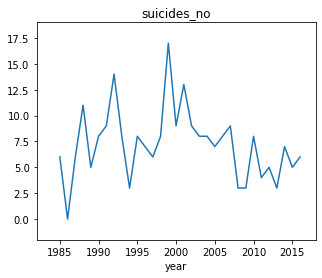

Women  Mexico 's suicides_no


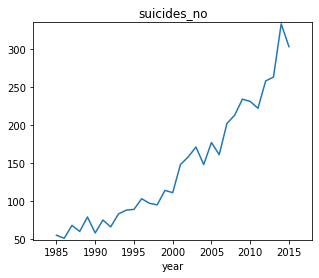

Women  Netherlands 's suicides_no


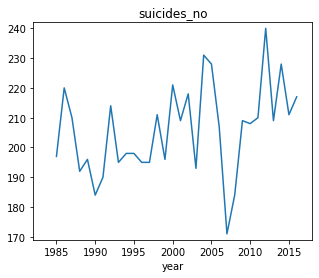

Women  New Zealand 's suicides_no


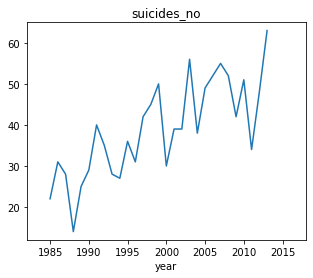

Women  Panama 's suicides_no


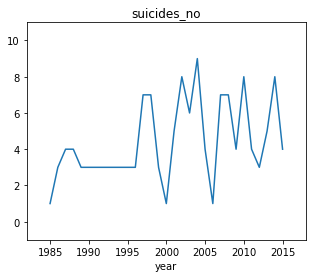

Women  Paraguay 's suicides_no


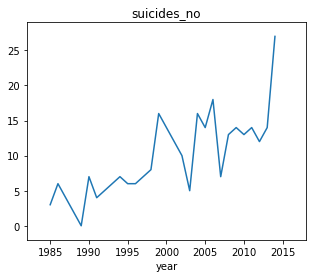

Women  Portugal 's suicides_no


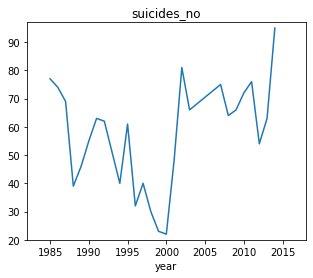

Women  Puerto Rico 's suicides_no


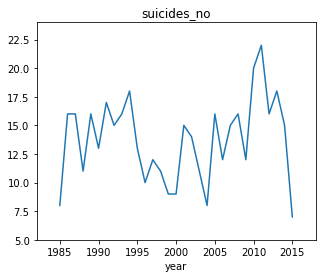

Women  Republic of Korea 's suicides_no


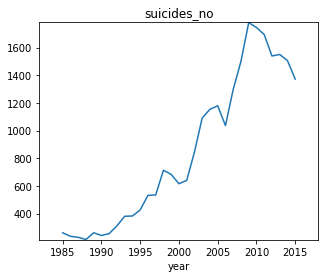

Women  Saint Vincent and Grenadines 's suicides_no


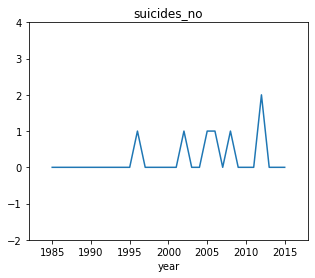

Women  Singapore 's suicides_no


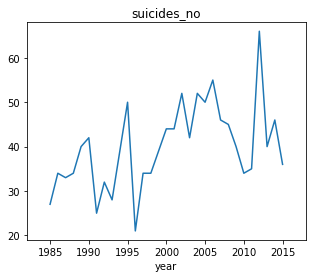

Women  Spain 's suicides_no


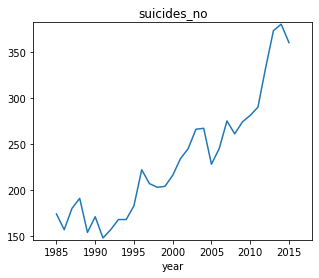

Women  Suriname 's suicides_no


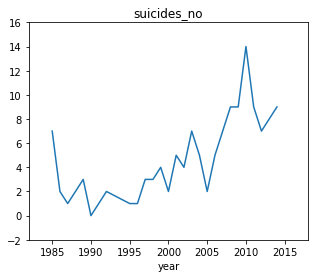

Women  Thailand 's suicides_no


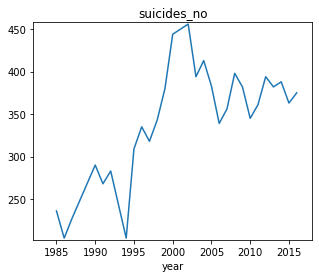

Women  Trinidad and Tobago 's suicides_no


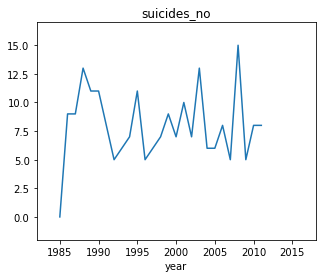

Women  United Kingdom 's suicides_no


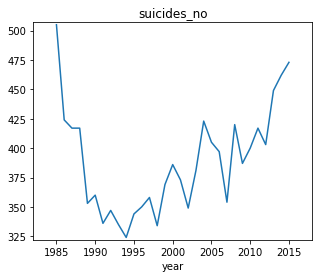

Women  United States 's suicides_no


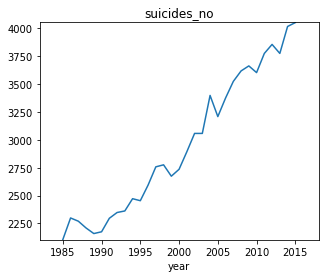

Women  Uruguay 's suicides_no


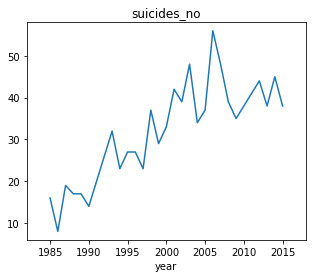

Women  Belize 's suicides_no


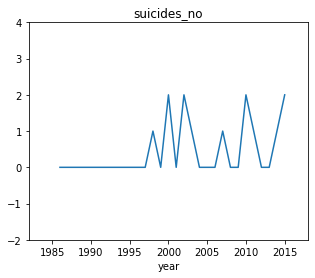

Women  Guatemala 's suicides_no


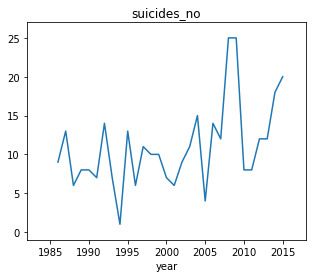

Women  Norway 's suicides_no


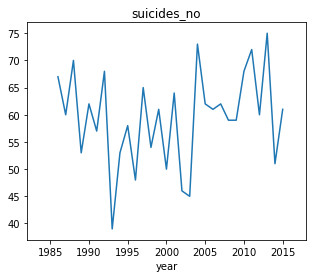

Women  Saint Lucia 's suicides_no


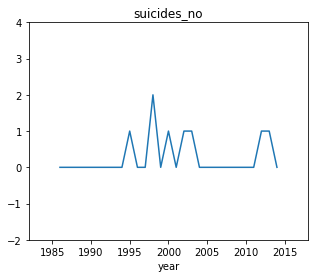

Women  Finland 's suicides_no


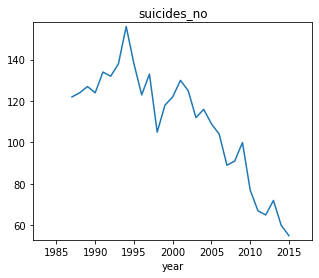

Women  Sweden 's suicides_no


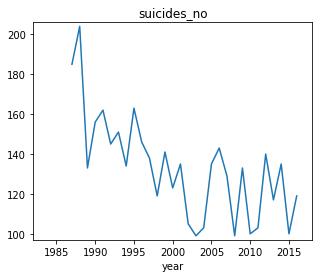

Women  Guyana 's suicides_no


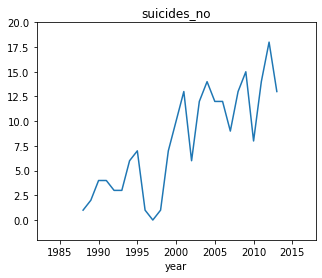

Women  Ukraine 's suicides_no


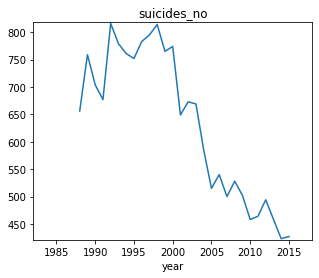

Women  Romania 's suicides_no


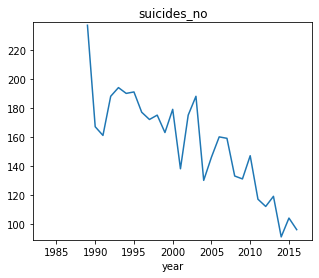

Women  Russian Federation 's suicides_no


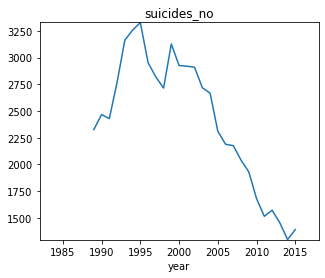

Women  Armenia 's suicides_no


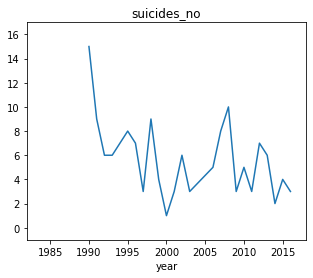

Women  Czech Republic 's suicides_no


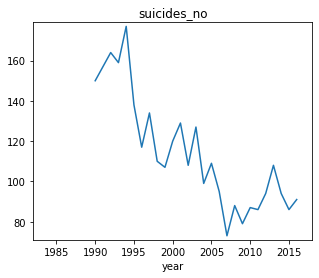

Women  Germany 's suicides_no


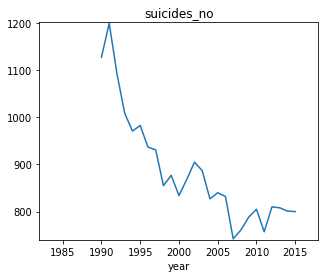

Women  Kazakhstan 's suicides_no


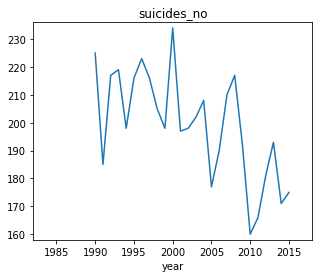

Women  Kyrgyzstan 's suicides_no


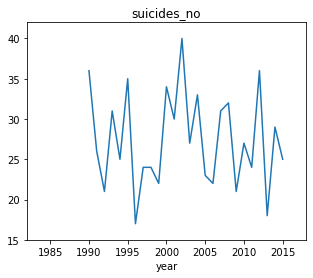

Women  Hungary 's suicides_no


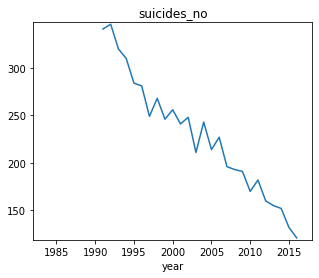

In [ ]:
# For female
for s in fecountry:
    for t in fetargets:
      print("Women ", s,"'s",t)
      plt.figure(figsize = (5,4))
      plt.title(t)
      fig = female_df[female_df["country"] == s][t].plot()
      fig.set_xlim(1982,2018)
      fig.set_ylim(female_df[female_df["country"] == s][t].min()-2,female_df[female_df["country"] == s][t].max()+2)
      plt.show()


### 1 B. Plot the suicide time series for all countries.

In [ ]:
pivot_test = male_df.pivot_table(index = "year",columns="country", values=targets)
pivot_test_fem = female_df.pivot_table(index = "year", columns = "country", values = targets)

pivot_test_fem

suicides_no                    ...                                     
country   Argentina Armenia Australia  ... United Kingdom United States Uruguay
year                                   ...                                     
1985          142.0     NaN     143.0  ...          505.0        2105.0    16.0
1986          188.0     NaN     169.0  ...          424.0        2299.0     8.0
1987          209.0     NaN     145.0  ...          417.0        2270.0    19.0
1988          198.0     NaN     157.0  ...          417.0        2209.0    17.0
1989          166.0     NaN     130.0  ...          353.0        2159.0    17.0
1990          163.0    15.0     136.0  ...          360.0        2175.0    14.0
1991          133.0     9.0     169.0  ...          336.0        2296.0     NaN
1992          140.0     6.0     144.0  ...          347.0        2348.0     NaN
1993          144.0     6.0     161.0  ...          335.0        2362.0    32.0
1994          160.0     7.0     162.0  ...          324.0        2472.0    23.0
1995          139.0     8.0     180.0  ...          344.0        2454.0    27.0
1996          176.0     7.0     182.0  ...          350.0        2594.0    27.0
1997          165.0     3.0     219.0  ...          358.0        2758.0    23.0
1998          147.0     9.0     202.0  ...          334.0        2776.0    37.0
1999          141.0     4.0     201.0  ...          369.0        2674.0    29.0
2000          174.0     1.0     200.0  ...          386.0        2736.0    33.0
2001          210.0     3.0     226.0  ...          373.0        2893.0    42.0
2002          194.0     6.0     213.0  ...          349.0        3058.0    39.0
2003          196.0     3.0     195.0  ...          381.0        3058.0    48.0
2004          185.0     NaN     183.0  ...          423.0        3399.0    34.0
2005          171.0     NaN       NaN  ...          405.0        3209.0    37.0
2006          160.0     5.0     195.0  ...          397.0        3376.0    56.0
2007          155.0     8.0     219.0  ...          354.0        3525.0    48.0
2008          173.0    10.0     231.0  ...          420.0        3619.0    39.0
2009          150.0     3.0     221.0  ...          387.0        3664.0    35.0
2010          162.0     5.0     228.0  ...          400.0        3604.0    38.0
2011          157.0     3.0     230.0  ...          417.0        3776.0     NaN
2012          164.0     7.0     258.0  ...          403.0        3857.0    44.0
2013          157.0     6.0     275.0  ...          449.0        3776.0    38.0
2014          196.0     2.0     277.0  ...          462.0        4018.0    45.0
2015          166.0     4.0     294.0  ...          473.0        4053.0    38.0
2016            NaN     3.0       NaN  ...            NaN           NaN     NaN

[32 rows x 57 columns]

In [ ]:
timeSeriesRes = pivot_test["suicides_no"]

inter_ts = timeSeriesRes.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts = inter_ts.interpolate(method = 'pad',axis =0)
#female
timeSeriesRes_fem = pivot_test_fem["suicides_no"]

inter_ts_fem = timeSeriesRes_fem.interpolate(method='linear', axis = 0,limit_direction ='backward')
inter_ts_fem = inter_ts_fem.interpolate(method = 'pad',axis =0)

In [ ]:
inter_ts

country  Argentina    Armenia  ...  United States     Uruguay
year                           ...                           
1985         414.0  25.000000  ...         6053.0   67.000000
1986         478.0  25.000000  ...         6450.0   45.000000
1987         482.0  25.000000  ...         6569.0   59.000000
1988         477.0  25.000000  ...         6528.0   56.000000
1989         462.0  25.000000  ...         6814.0   78.000000
1990         439.0  25.000000  ...         7260.0   75.000000
1991         398.0  14.000000  ...         7454.0   79.333333
1992         488.0  22.000000  ...         7679.0   83.666667
1993         495.0  25.000000  ...         7976.0   88.000000
1994         527.0  31.000000  ...         8199.0   89.000000
1995         485.0  32.000000  ...         8545.0   83.000000
1996         524.0  24.000000  ...         8984.0   80.000000
1997         501.0  26.000000  ...         8920.0   93.000000
1998         508.0  20.000000  ...         9192.0  114.000000
1999         545.0  22.000000  ...         8873.0   99.000000
2000         578.0  18.000000  ...         9263.0  135.000000
2001         625.0  19.000000  ...         9684.0  122.000000
2002         619.0  22.000000  ...        10101.0  152.000000
2003         625.0  21.000000  ...        10025.0  107.000000
2004         599.0  19.666667  ...        10145.0  119.000000
2005         539.0  18.333333  ...        10332.0   93.000000
2006         585.0  17.000000  ...        10641.0   93.000000
2007         571.0  19.000000  ...        10978.0  128.000000
2008         582.0  11.000000  ...        11371.0  131.000000
2009         542.0  17.000000  ...        11613.0  107.000000
2010         573.0  15.000000  ...        11767.0  101.000000
2011         504.0  23.000000  ...        11681.0  122.500000
2012         554.0  26.000000  ...        11763.0  144.000000
2013         604.0  13.000000  ...        11396.0  118.000000
2014         644.0  13.000000  ...        11455.0  150.000000
2015         633.0  15.000000  ...        11634.0  135.000000
2016         633.0  16.000000  ...        11634.0  135.000000

[32 rows x 57 columns]

In [ ]:
inter_ts_fem

country  Argentina    Armenia  ...  United States  Uruguay
year                           ...                        
1985         142.0  15.000000  ...         2105.0     16.0
1986         188.0  15.000000  ...         2299.0      8.0
1987         209.0  15.000000  ...         2270.0     19.0
1988         198.0  15.000000  ...         2209.0     17.0
1989         166.0  15.000000  ...         2159.0     17.0
1990         163.0  15.000000  ...         2175.0     14.0
1991         133.0   9.000000  ...         2296.0     20.0
1992         140.0   6.000000  ...         2348.0     26.0
1993         144.0   6.000000  ...         2362.0     32.0
1994         160.0   7.000000  ...         2472.0     23.0
1995         139.0   8.000000  ...         2454.0     27.0
1996         176.0   7.000000  ...         2594.0     27.0
1997         165.0   3.000000  ...         2758.0     23.0
1998         147.0   9.000000  ...         2776.0     37.0
1999         141.0   4.000000  ...         2674.0     29.0
2000         174.0   1.000000  ...         2736.0     33.0
2001         210.0   3.000000  ...         2893.0     42.0
2002         194.0   6.000000  ...         3058.0     39.0
2003         196.0   3.000000  ...         3058.0     48.0
2004         185.0   3.666667  ...         3399.0     34.0
2005         171.0   4.333333  ...         3209.0     37.0
2006         160.0   5.000000  ...         3376.0     56.0
2007         155.0   8.000000  ...         3525.0     48.0
2008         173.0  10.000000  ...         3619.0     39.0
2009         150.0   3.000000  ...         3664.0     35.0
2010         162.0   5.000000  ...         3604.0     38.0
2011         157.0   3.000000  ...         3776.0     41.0
2012         164.0   7.000000  ...         3857.0     44.0
2013         157.0   6.000000  ...         3776.0     38.0
2014         196.0   2.000000  ...         4018.0     45.0
2015         166.0   4.000000  ...         4053.0     38.0
2016         166.0   3.000000  ...         4053.0     38.0

[32 rows x 57 columns]

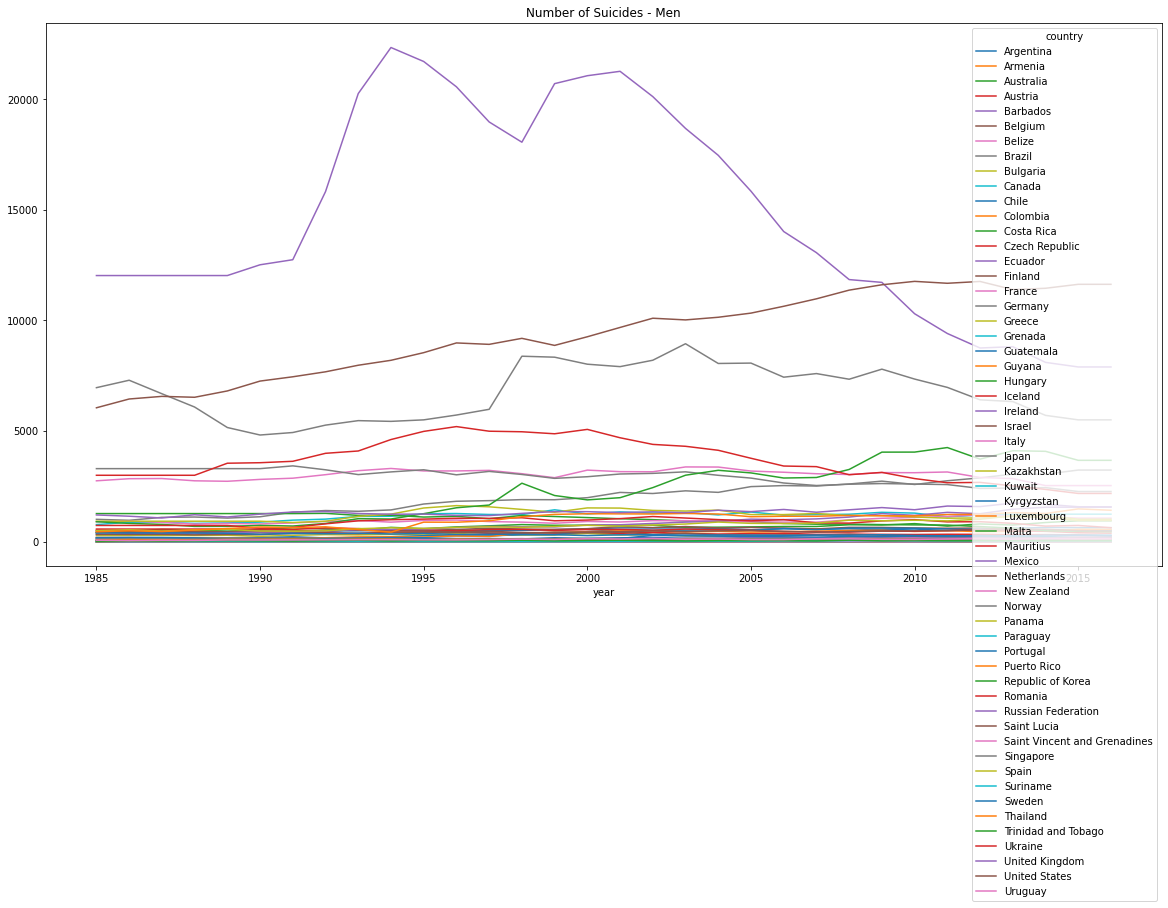

In [ ]:
inter_ts.plot(figsize = (20,10), title = "Number of Suicides - Men")

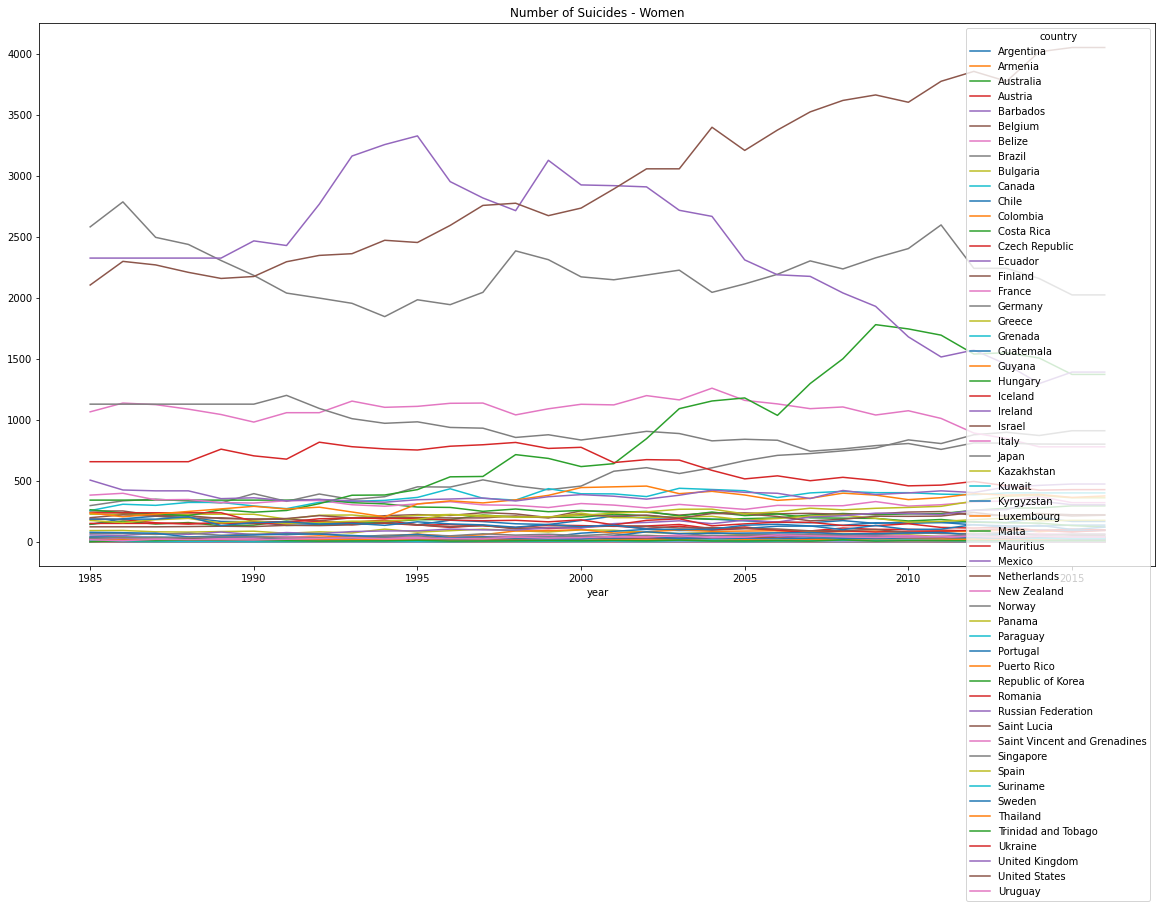

In [ ]:
inter_ts_fem.plot(figsize = (20,10), title = "Number of Suicides - Women")

## 2. Apply Hierarchical Clustering in order to identify those countries with similar behaviors in the time series.

### 2 A. method Ward with Euclidean distance



In [ ]:
Z = hac.linkage(inter_ts.T, method='ward', metric='euclidean')
Z_f = hac.linkage(inter_ts_fem.T, method='ward', metric='euclidean')

In [ ]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    print(results)

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
        plt.show()


[ 7  6  4  7  6  7  6  1  7  5  7  7  6  7  6  7  2  2  6  6  6  6  5  6
  6  6  4  8  5  6  6  6  6  6  4  7  6  6  6  6  6  6  1  4 10  6  6  6
  4  6  7  4  6  3  5  9  6]
Cluster 7 number of entries 10


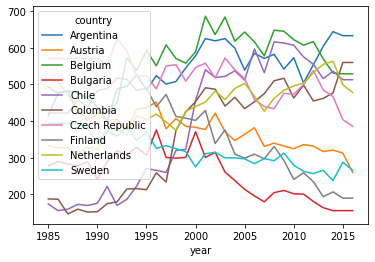

Cluster 6 number of entries 29


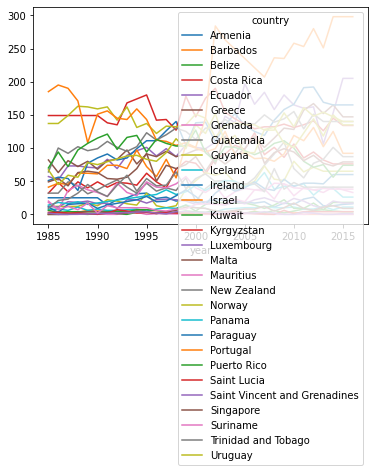

Cluster 4 number of entries 6


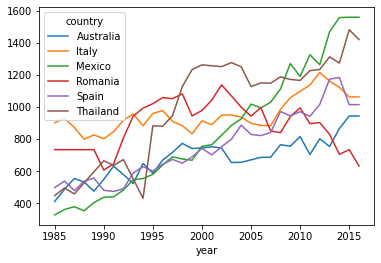

Cluster 1 number of entries 2


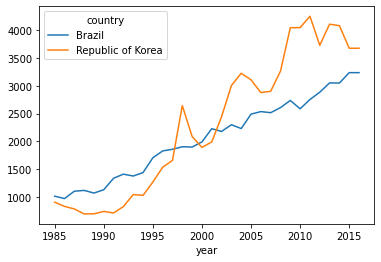

Cluster 5 number of entries 4


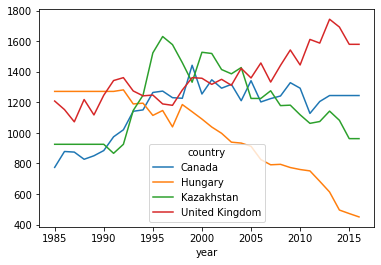

Cluster 2 number of entries 2


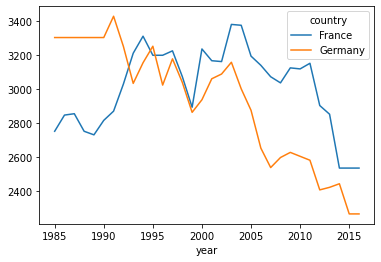

Cluster 8 number of entries 1


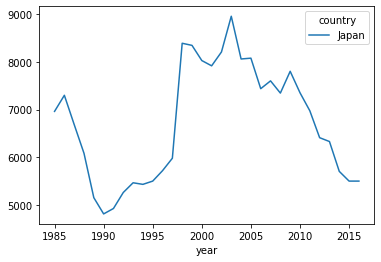

Cluster 10 number of entries 1


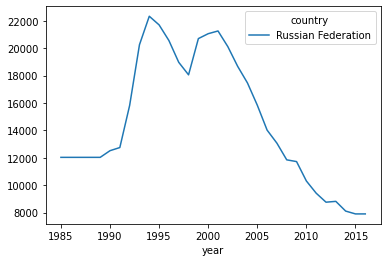

Cluster 3 number of entries 1


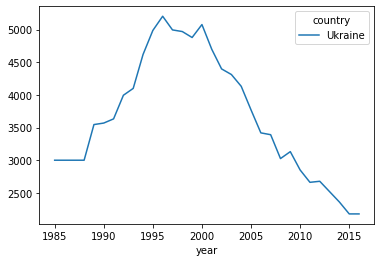

Cluster 9 number of entries 1


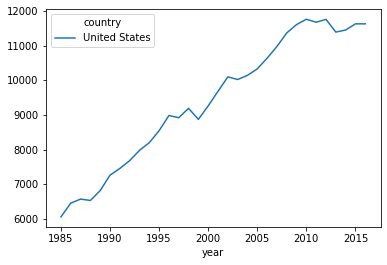

In [ ]:
print_clusters(inter_ts.T, Z, 10, True)

[10  8 10  8  8 10  8  5  8  9  8  8  8  8  8  8  4  4  8  8  8  8 10  8
  8  8  9  1 10  8  8  8  8  8 10 10  8  8  8  8  8  8  7 10  2  8  8  8
 10  8  8  9  8  6  9  3  8]
Cluster 10 number of entries 9


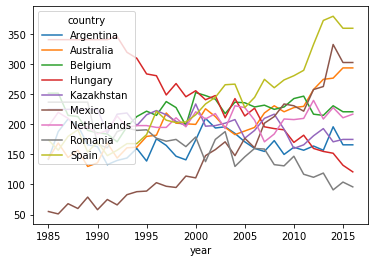

Cluster 8 number of entries 36


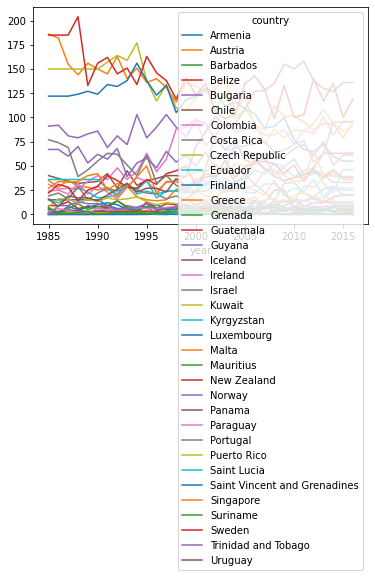

Cluster 5 number of entries 1


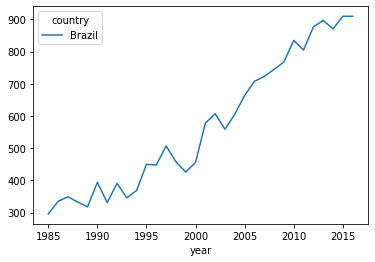

Cluster 9 number of entries 4


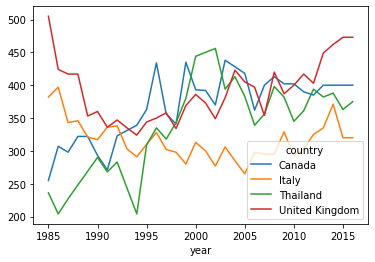

Cluster 4 number of entries 2


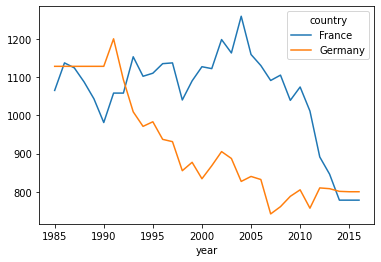

Cluster 1 number of entries 1


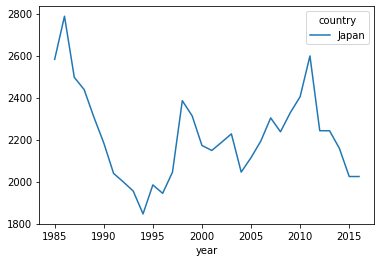

Cluster 7 number of entries 1


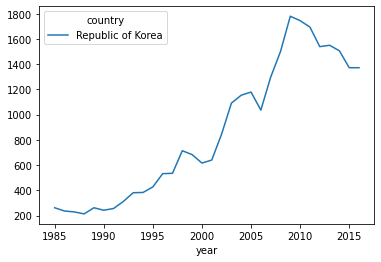

Cluster 2 number of entries 1


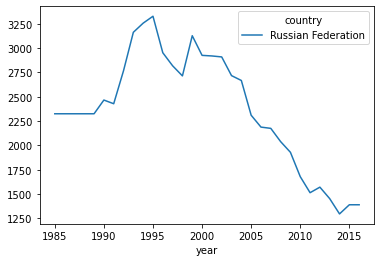

Cluster 6 number of entries 1


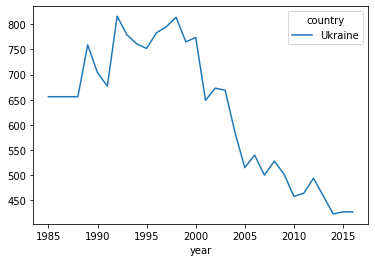

Cluster 3 number of entries 1


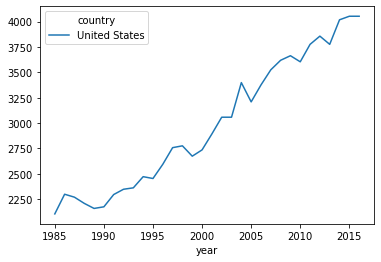

In [ ]:
print_clusters(inter_ts_fem.T, Z_f, 10, True)

### 2 B. Plot the dendrogram

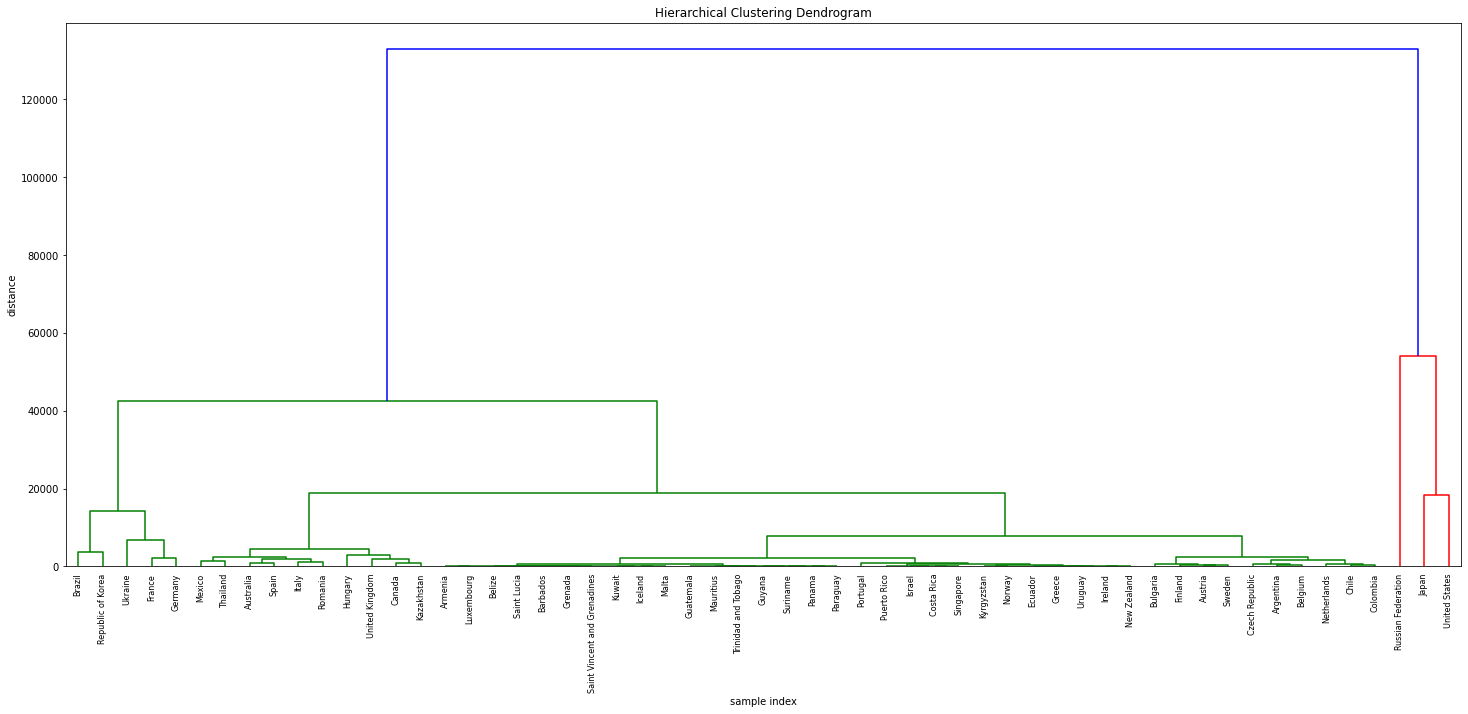

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

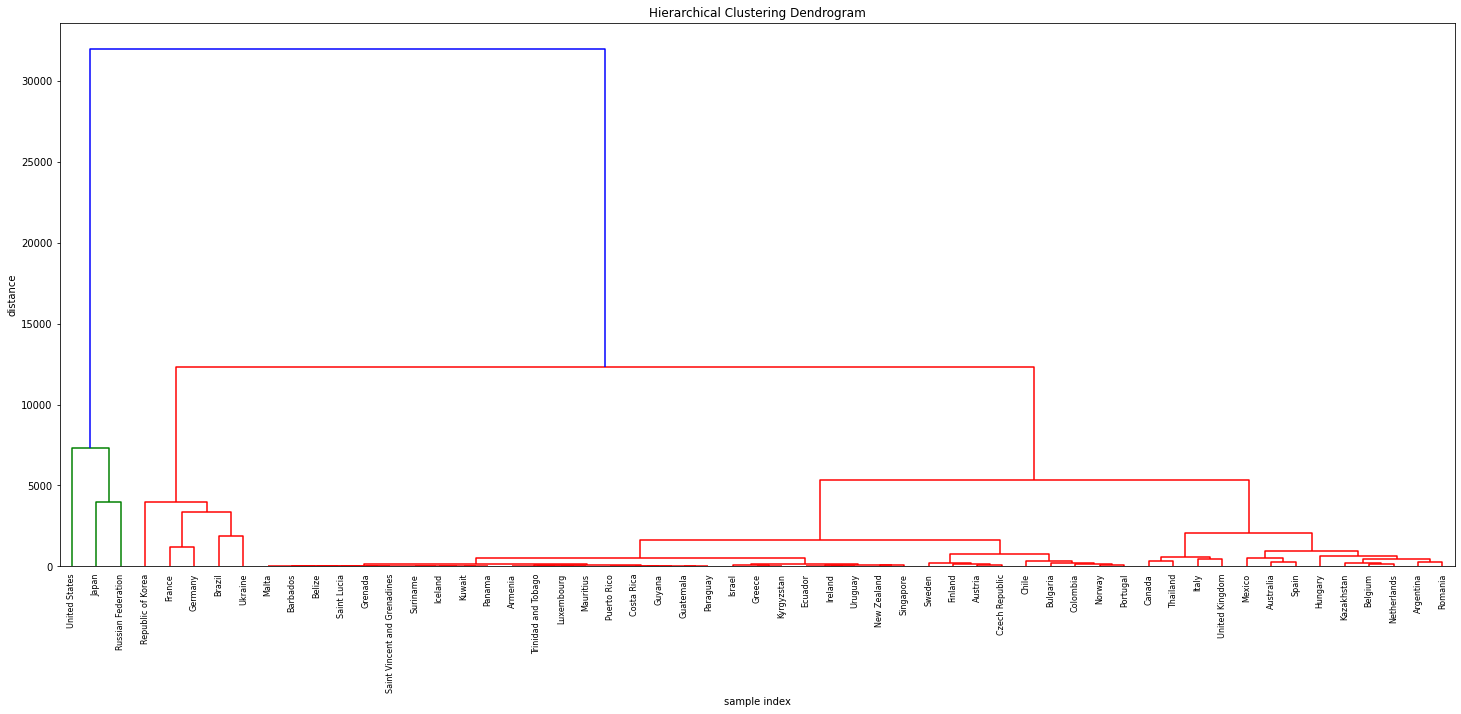

In [ ]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
# Here we use dtw as distance metric
def dtw(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance
Z3 = hac.linkage(inter_ts.T, method='single', metric=dtw)
Z3_f = hac.linkage(inter_ts_fem.T, method='single', metric=dtw)


### 2 E. Plot the 3 dendrograms: single, DTW


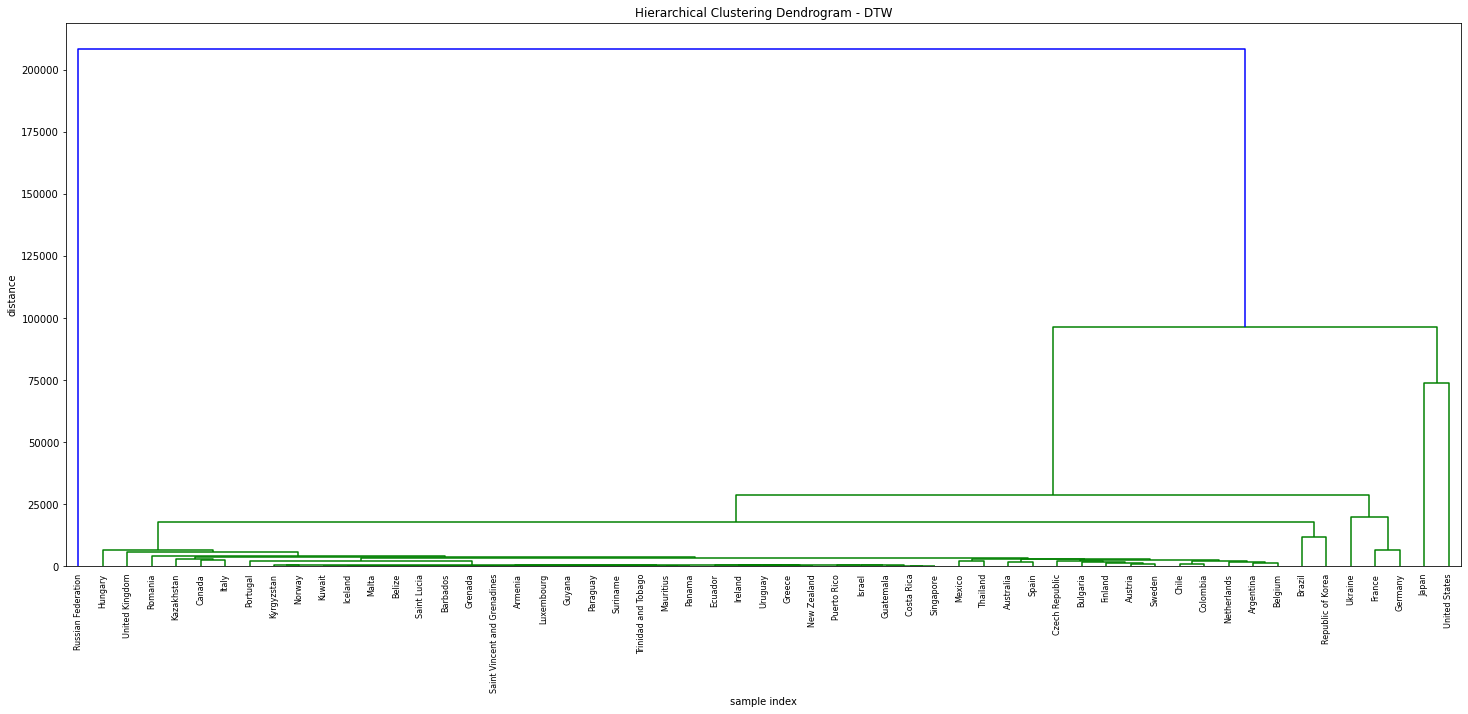

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3,
    labels = inter_ts.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

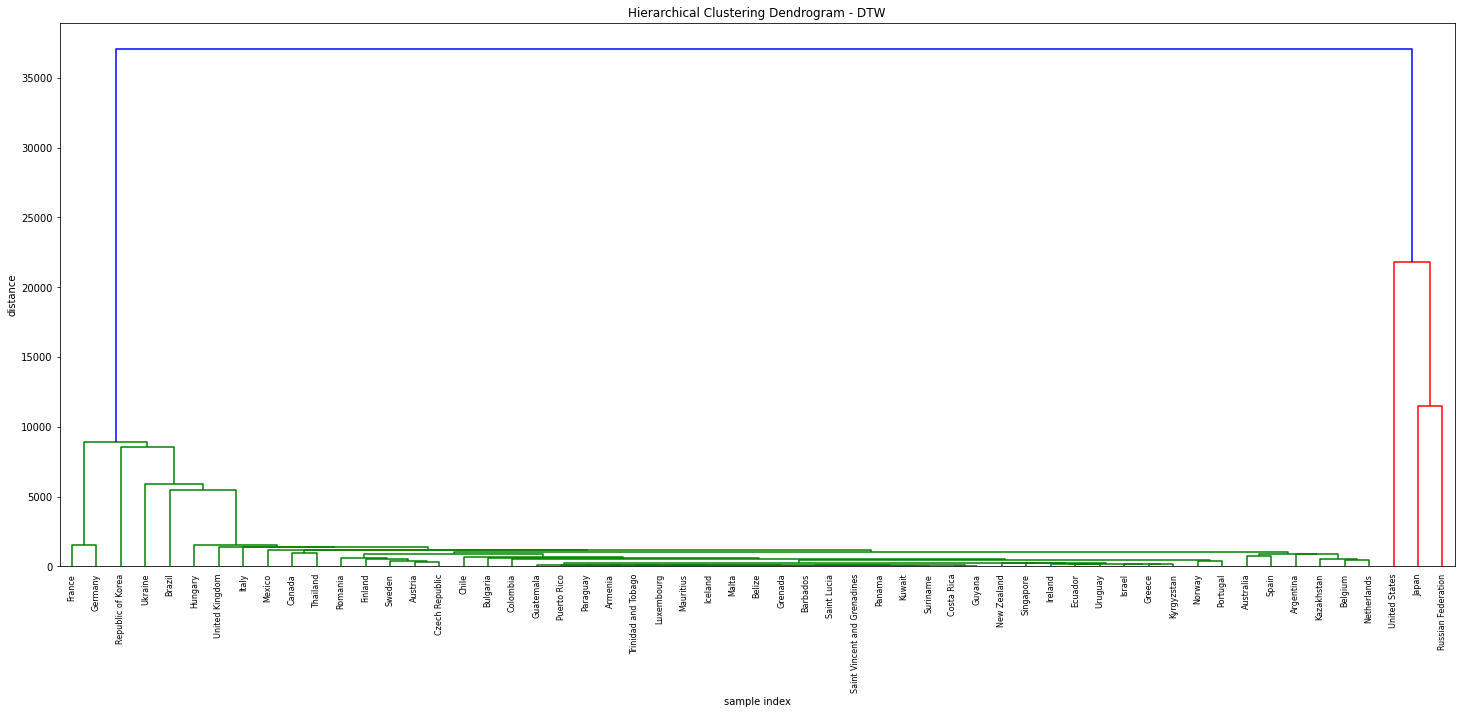

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - DTW')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z3_f,
    labels = inter_ts_fem.T.index,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### For the case of simple-DTW:

Same thing as the other two. There is a cluster that has 28 states, which is almost all of them.
With this type of visualization, we can also see which states are the ones that behave differently.

[ 1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  5  6  1  1  1  1  2  1
  1  1  1  8  1  1  1  1  1  1  1  1  1  1  1  1  1  1  4  1 10  1  1  1
  1  1  1  1  1  7  1  9  1]
Cluster 1 number of entries 48


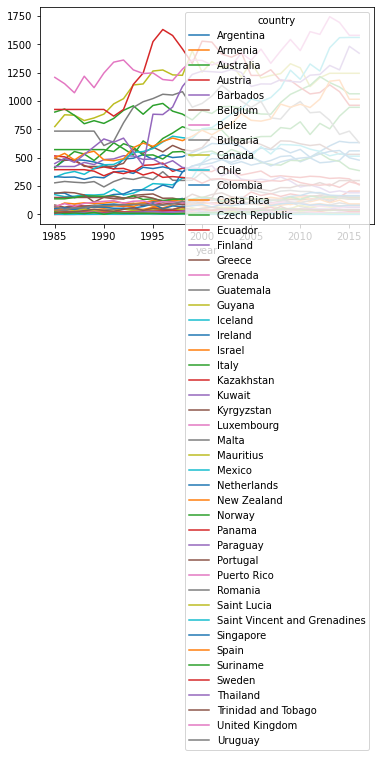

Cluster 3 number of entries 1


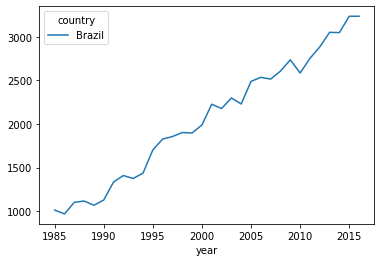

Cluster 5 number of entries 1


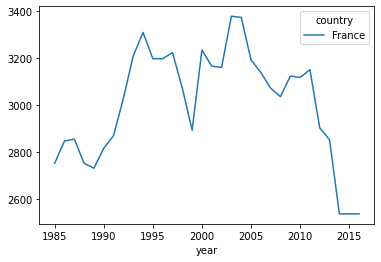

Cluster 6 number of entries 1


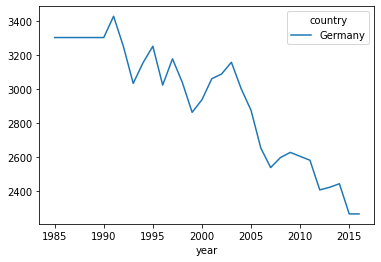

Cluster 2 number of entries 1


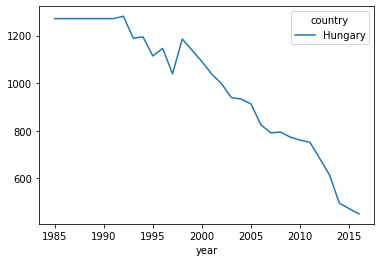

Cluster 8 number of entries 1


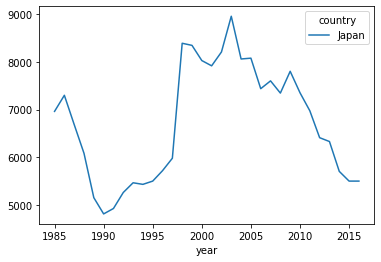

Cluster 4 number of entries 1


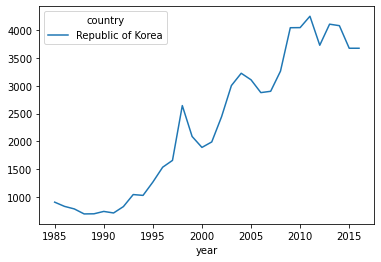

Cluster 10 number of entries 1


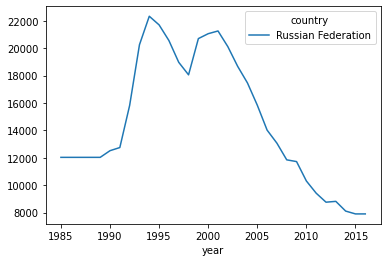

Cluster 7 number of entries 1


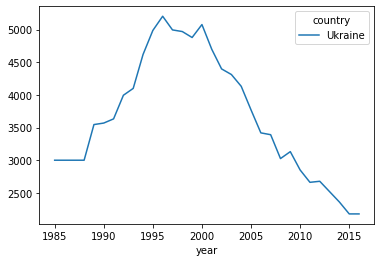

Cluster 9 number of entries 1


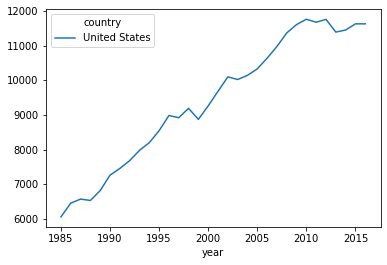

In [ ]:
print_clusters(inter_ts.T, Z3, 10, True)

[ 3  3  3  3  3  3  3  5  3  3  3  3  3  3  3  3  1  2  3  3  3  3  4  3
  3  3  3  8  3  3  3  3  3  3  3  3  3  3  3  3  3  3  7  3  9  3  3  3
  3  3  3  3  3  6  3 10  3]
Cluster 3 number of entries 48


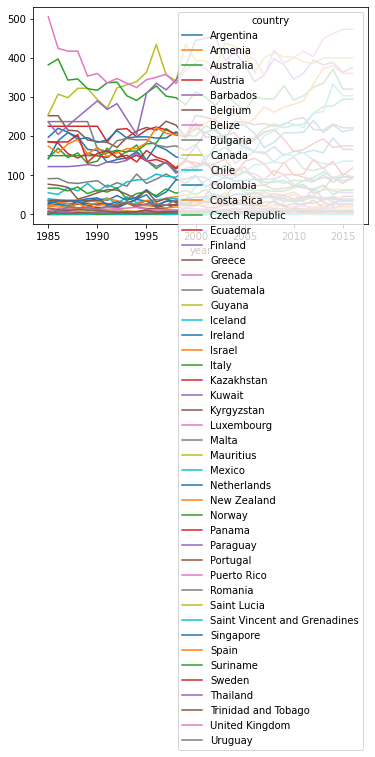

Cluster 5 number of entries 1


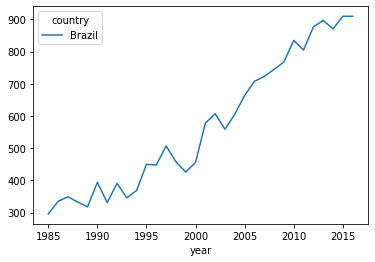

Cluster 1 number of entries 1


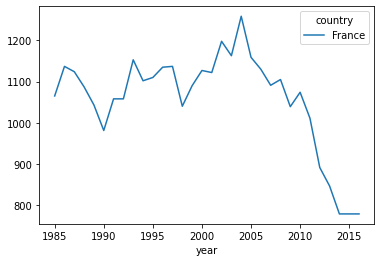

Cluster 2 number of entries 1


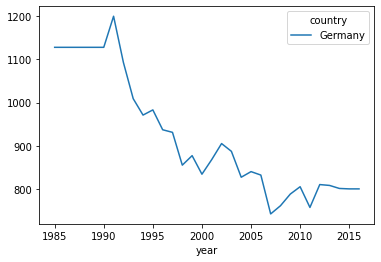

Cluster 4 number of entries 1


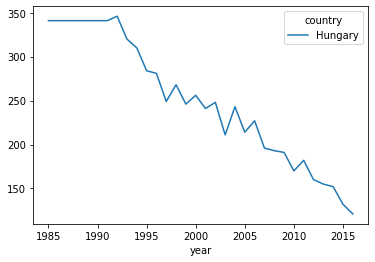

Cluster 8 number of entries 1


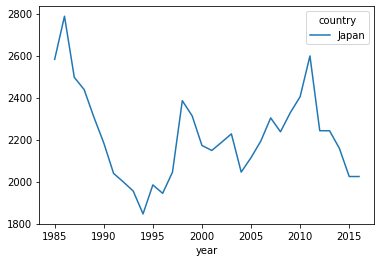

Cluster 7 number of entries 1


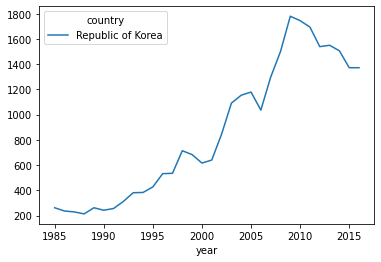

Cluster 9 number of entries 1


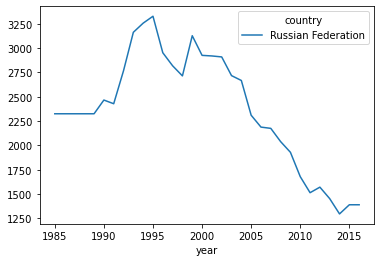

Cluster 6 number of entries 1


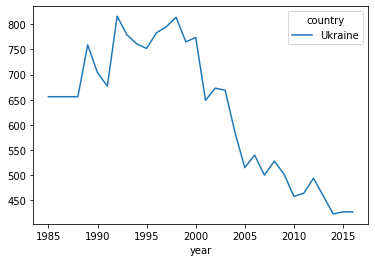

Cluster 10 number of entries 1


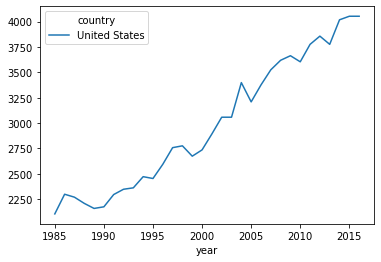

In [ ]:
print_clusters(inter_ts_fem.T, Z3_f, 10, True)